## Импорт данных

In [127]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import ANN_classes as ann
import custom_classes as cc
from importlib import reload
import scipy.interpolate
from matplotlib.ticker import FuncFormatter

In [128]:
reload(ann)

<module 'ANN_classes' from '/home/quantumfox/JupyterWorkfolder/Py3/ANN/ANN_classes.py'>

In [129]:
ann.vercheck('0.10.0-test')

ANN vercheck OK


In [130]:
in_x = np.sort(np.random.random(100)*10)
in_y = [item**2 for item in in_x]

In [228]:
ann3 = ann.NNetwork_test(1,6,1)
ann3.nwgh_tune(1.,0.3)
ann3.nacc_tune(0.005)
ann3.nexs_tune(1)
iterc = 0

In [234]:
%pwd

'/home/quantumfox/JupyterWorkfolder/Py3'

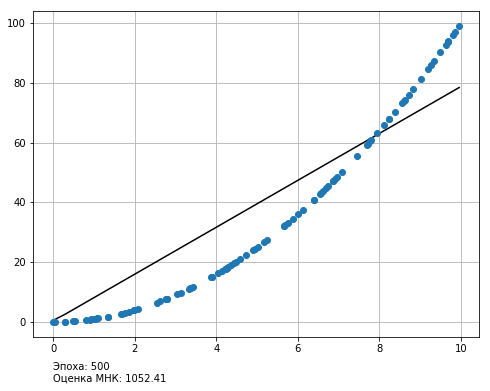

FileNotFoundError: [Errno 2] No such file or directory: 'ann_testbook_fig/quadratic_epoch500.png'

In [233]:
for _ in range(500):
    iterc += 1
    pick = np.random.randint(len(in_x))
    ann3.forward([in_x[pick]])
    ann3.getnetgrad([in_y[pick]])
    ann3.backward()
    ann3.ncommit()

    ann_in_y = [ann3.forward([item])[0][0] for item in in_x]
    
mnk_crit = cc.sqdistance(ann_in_y, in_y)
    
plt.figure(figsize=(8,6))
plt.plot(in_x, ann_in_y, 'k-')
plt.plot(in_x, in_y, 'o')
plt.grid()

plt.text(0, -20, u'Эпоха: {0}\nОценка МНК: {1:3.2f}'
         .format(iterc, mnk_crit))
plt.show()
plt.savefig('ann_testbook_fig/quadratic_epoch{}'.format(iterc),
            bbox_inches='tight')

In [153]:
cc.sqdistance(in_y, ann_in_y)

387.84548108985121

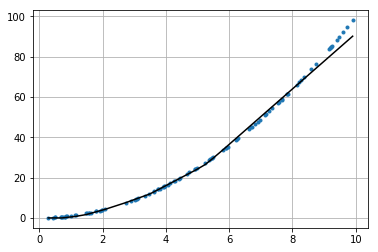

In [126]:
plt.figure()
plt.plot(in_x, in_y, '.')
plt.plot(in_x, ann_in_y, 'k-')
plt.grid()
plt.show()